### Procedure for making OHLC candels-  try on 2 sec OHLC, the 1 min was a too short run onsisting of only 16 rows

In [2]:
import seaborn as sns

In [3]:
# Python 3.8.2 kernel
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
import statsmodels.api as sm                             ####   reference print(sm.datasets.macrodata.NOTE) 
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go

### Import Final DS - - - from lr1 = specifically chosen linear run fitting linear regression analysis
- Read LR ds
- Create Input Parameters
- Create X and y Datasets


In [6]:
## procedural functions for OHLC candles
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).max()             
    dfLow = df.resample('2S', on= on_name).min() 
    dfOpen = df.resample('2S', on= on_name).first() 
    dfClose = df.resample('2S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_10Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10S', on= on_name).max()             
    dfLow = df.resample('10S', on= on_name).min() 
    dfOpen = df.resample('10S', on= on_name).first() 
    dfClose = df.resample('10S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3Min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).max()             
    dfLow = df.resample('3T', on= on_name).min() 
    dfOpen = df.resample('3T', on= on_name).first() 
    dfClose = df.resample('3T', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec_BidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).sum()             
    dfLow = df.resample('2S', on= on_name).sum() 
    dfOpen = df.resample('2S', on= on_name).sum() 
    dfClose = df.resample('2S', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1T', on= on_name).sum()             
    dfLow = df.resample('1T', on= on_name).sum() 
    dfOpen = df.resample('1T', on= on_name).sum() 
    dfClose = df.resample('1T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).sum()             
    dfLow = df.resample('3T', on= on_name).sum() 
    dfOpen = df.resample('3T', on= on_name).sum() 
    dfClose = df.resample('3T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d

#### to save time, this nb will utilse the previous 1 min candle vars and just change the procedure while retaining the var names (which refer to 1 min although it will be 2 seconds)

In [22]:
# lr1_1min = resampling_2Sec(lr1['Price'], 'Price', lr1.Date, 'Date')  
# mapping1M = {lr1_1min.columns[0]: 'Open', lr1_1min.columns[1]: 'High', lr1_1min.columns[2]: 'Low', lr1_1min.columns[3]: 'Close'}
# lr1_1min = lr1_1min.rename(columns= mapping1M)
# lr1_1min.head(6)
# # lr1_1min.shape               #  2 sec  = (601, 4) 

# lr1Vol = resampling_2Sec_BidAsk(lr1['Vol'], 'Vol', lr1.Date, 'Date')
# mapping1 = {lr1Vol.columns[1]: 'Vol'}
# lr1Vol = lr1Vol.rename(columns= mapping1)
# del lr1Vol['Vol_x_x']
# del lr1Vol['Vol_y_y']
# del lr1Vol['Vol_x_y']
# lr1Vol.head(5)
# lr1Vol.shape                           # (601, 1)

# nqBidAsk1 = resampling_2Sec_BidAsk(lr1['BidAsk'], 'BidAsk', lr1.Date, 'Date')
# mappingBA = {nqBidAsk1.columns[1]: 'BidAsk'}
# nqBidAsk1 = nqBidAsk1.rename(columns= mappingBA)
# del nqBidAsk1['BidAsk_x_x']
# del nqBidAsk1['BidAsk_x_y']
# del nqBidAsk1['BidAsk_y_y']
# nqBidAsk1.sample(20)
# nqBidAsk1.shape                        # (601, 1)

# lr1Min = merge_DFs(nqBidAsk1, lr1Vol, lr1_1min)
# lr1Min.shape                                # (21, 6)
# lr1Min.dropna(inplace=True)
lr1Min.shape                #     (601, 6)
lr1Min.head(3)
# lr1Min.to_csv('2022-09-19_ES_2sec_LR.csv')    # save 2 sec LR OHLC set

,BidAsk,Vol,Open,High,Low,Close
Date,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50


In [26]:
# lr1_1min = pd.read_csv(r"2022-09-19_ES_2sec_LR.csv", index_col='Date')
# lr1_1min.index = pd.to_datetime(lr1_1min.index)
# lr1_1min.head()
# lr1_1min.shape
# lr1_1min['Close'].plot(figsize=(20,5) )
hovertext=[]
for i in range(len(lr1_1min['Open'])):
    hovertext.append('Open: '+str(lr1_1min['Open'][i])+'<br>Close: '+str(lr1_1min['Close'][i]))
    
fig = go.Figure(data= go.Ohlc(x= lr1_1min.index, open= lr1_1min['Open'], high= lr1_1min['High'],  
                low= lr1_1min['Low'], close= lr1_1min['Close'], text= hovertext, hoverinfo= 'text'))
fig.show()

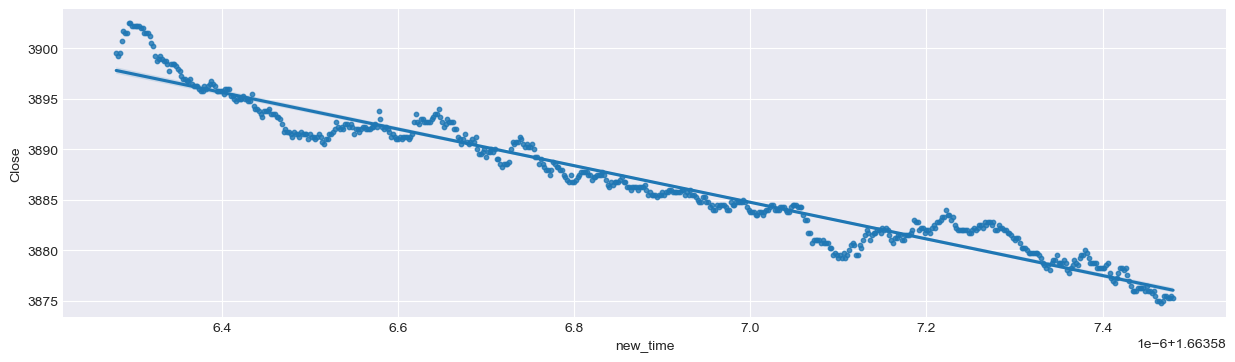

In [42]:
plt.figure(figsize=(15,4))
sns.regplot(x= 'new_time' , y= 'Close', data= lr1_1min, scatter_kws={"s": 10})

In [17]:

# lr1_1min.isna().sum()  # no NaN values
lr1_1min.shape  #   (601, 6)

(601, 4)

### Create Input Parameters

#### Create custom derived features, which will help in making the prediction.

- S_1, S_3, S_5: 1-min, 3-min and 5-min moving average for set from Close prices, respectively.
- Corr: Compute the correlation between the Close price and S_3.
- Std_U,Std_D: Difference between High & Open, Open & Low respectively.
- OD, OL: Difference between Open & previous minute's Open, and Open & previous minute's Close respectively.

- all var names refer to 2 seconds (where showing 1 min )

In [270]:
# Calculate 1-min moving average of Close prices
lr1_1min['S_1'] = lr1_1min['Close'].shift(1).rolling(window=1).mean()
# Calculate 3-min moving average of close prices
lr1_1min['S_3'] = lr1_1min['Close'].shift(1).rolling(window= 3).mean()

# Calculate 5-min moving average of Close prices
lr1_1min['S_5'] = lr1_1min['Close'].shift(1).rolling(window= 5).mean()

In [271]:
# Calculate correlation between Close price and 1-min moving average
lr1_1min['Corr'] = lr1_1min['Close'].shift(1).rolling(window= 3).corr(lr1_1min['S_1'].shift(1))

In [272]:
# Calculate the difference between High & Open, Open & Low
lr1_1min['Std_U'] = lr1_1min['High'] - lr1_1min['Open']
lr1_1min['Std_D'] = lr1_1min['Open'] - lr1_1min['Low']


In [273]:
# Calculate the difference between `Open` & previous min `Open`, and `Open` & previous min `Close`
lr1_1min['OD'] = lr1_1min['Open'] - lr1_1min['Open'].shift(1)
lr1_1min['OL'] = lr1_1min['Open'] - lr1_1min['Close'].shift(1)

In [279]:

lr1_1min.head(20)
# lr1_1min.shape  # (601, 14)
# lr1_1min.fillna(inplace=True, method='ffill')
# lr1_1min.fillna(inplace=True, method='bfill')

,BidAsk,Vol,Open,High,Low,Close,S_1,S_3,S_5,Corr,Std_U,Std_D,OD,OL
Date,,,,,,,,,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50,3899.50,3899.416667,3900.15,0.359211,0.25,0.00,0.00,-0.25
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25,3899.50,3899.416667,3900.15,0.359211,0.00,0.00,0.00,-0.25
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50,3899.25,3899.416667,3900.15,0.359211,0.25,0.00,0.00,0.00
2022-09-19 11:18:06,221,437,3899.75,3900.75,3899.75,3900.75,3899.50,3899.416667,3900.15,0.359211,1.00,0.00,0.50,0.25
2022-09-19 11:18:08,100,517,3901.25,3901.75,3901.25,3901.75,3900.75,3899.833333,3900.15,0.359211,0.50,0.00,1.50,0.50
2022-09-19 11:18:10,40,395,3901.25,3901.50,3901.25,3901.50,3901.75,3900.666667,3900.15,0.908346,0.25,0.00,0.00,-0.50
2022-09-19 11:18:12,-29,179,3901.50,3901.50,3901.50,3901.50,3901.50,3901.333333,3900.55,0.763487,0.00,0.00,0.25,0.00
2022-09-19 11:18:14,246,927,3902.75,3902.75,3902.50,3902.50,3901.50,3901.583333,3901.00,-0.970725,0.00,0.25,1.25,1.25
2022-09-19 11:18:16,-105,511,3902.50,3902.50,3902.50,3902.50,3902.50,3901.833333,3901.60,-0.500000,0.00,0.00,-0.25,0.00


### Create X and y Datasets

In [280]:
# Independent variables
X = lr1_1min[['Open', 'S_1', 'S_3', 'S_5', 'OD', 'OL', 'Corr']]
X.tail()
# X.shape   #  (21, 7)

,Open,S_1,S_3,S_5,OD,OL,Corr
Date,,,,,,,
2022-09-19 11:37:52,3875.50,3875.50,3875.083333,3875.05,0.50,0.00,0.188982
2022-09-19 11:37:54,3875.25,3875.50,3875.333333,3875.15,-0.25,-0.25,0.755929
2022-09-19 11:37:56,3875.25,3875.25,3875.416667,3875.20,0.00,0.00,-0.500000
2022-09-19 11:37:58,3875.50,3875.25,3875.333333,3875.30,0.25,0.25,0.500000
2022-09-19 11:38:00,3875.25,3875.50,3875.333333,3875.40,-0.25,-0.25,-0.500000


In [289]:
# Dependent variable for upward deviation - Market going UP
yU = lr1_1min['Std_U']
yU.sample(22)

Date
2022-09-19 11:32:48    0.00
2022-09-19 11:29:56    0.00
2022-09-19 11:25:22    0.00
2022-09-19 11:31:50    0.25
2022-09-19 11:35:30    0.00
2022-09-19 11:31:58    0.00
2022-09-19 11:25:40    0.00
2022-09-19 11:30:08    0.00
2022-09-19 11:22:28    0.00
2022-09-19 11:24:36    0.50
2022-09-19 11:34:18    0.00
2022-09-19 11:21:32    0.00
2022-09-19 11:23:42    0.00
2022-09-19 11:24:40    0.00
2022-09-19 11:31:22    0.00
2022-09-19 11:20:26    0.00
2022-09-19 11:27:00    0.00
2022-09-19 11:21:48    0.25
2022-09-19 11:30:52    0.00
2022-09-19 11:19:54    0.00
2022-09-19 11:23:36    0.25
2022-09-19 11:24:12    0.00
Name: Std_U, dtype: float64

In [298]:
# Dependent variable for downward deviation  - Market going Down
# yU = lr1_1min['Std_U']
# yD = lr1_1min['Std_D']
yD.sample(5)
# yD.shape    # (601,)

Date
2022-09-19 11:29:02    0.00
2022-09-19 11:29:34    0.00
2022-09-19 11:24:52    0.25
2022-09-19 11:23:40    0.00
2022-09-19 11:22:06    0.00
Name: Std_D, dtype: float64

In [300]:
lr1_1min.to_csv('lr1_2sec_input_parameters.csv', index = True)

### DS Processing for Modeling

In [301]:
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import the libraries
import numpy as np
import pandas as pd

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [302]:
#  check NaN ?
lr1_1min.isna().sum()

BidAsk    0
Vol       0
Open      0
High      0
Low       0
Close     0
S_1       0
S_3       0
S_5       0
Corr      0
Std_U     0
Std_D     0
OD        0
OL        0
dtype: int64

In [305]:
# Independent variables
X = lr1_1min[['Open', 'S_1', 'S_3', 'S_5', 'OD', 'OL', 'Corr']]

# Dependent variable for upward deviation
yU = lr1_1min['Std_U']

# Dependent variable for downward deviation
yD = lr1_1min['Std_D']

In [306]:
X.head(16)

,Open,S_1,S_3,S_5,OD,OL,Corr
Date,,,,,,,
2022-09-19 11:18:00,3899.25,3899.50,3899.416667,3900.15,0.00,-0.25,0.359211
2022-09-19 11:18:02,3899.25,3899.50,3899.416667,3900.15,0.00,-0.25,0.359211
2022-09-19 11:18:04,3899.25,3899.25,3899.416667,3900.15,0.00,0.00,0.359211
2022-09-19 11:18:06,3899.75,3899.50,3899.416667,3900.15,0.50,0.25,0.359211
2022-09-19 11:18:08,3901.25,3900.75,3899.833333,3900.15,1.50,0.50,0.359211
2022-09-19 11:18:10,3901.25,3901.75,3900.666667,3900.15,0.00,-0.50,0.908346
2022-09-19 11:18:12,3901.50,3901.50,3901.333333,3900.55,0.25,0.00,0.763487
2022-09-19 11:18:14,3902.75,3901.50,3901.583333,3901.00,1.25,1.25,-0.970725
2022-09-19 11:18:16,3902.50,3902.50,3901.833333,3901.60,-0.25,0.00,-0.500000


In [311]:
X['Corr'].replace([np.inf, -np.inf], 0, inplace=True)   # deal with inf values


In [312]:
X['Corr'].describe()

count    601.000000
mean       0.127571
std        0.616641
min       -1.000000
25%       -0.500000
50%        0.188982
75%        0.500000
max        1.000000
Name: Corr, dtype: float64

In [313]:
X['Corr'].min()  #   -0.9999999404685695
X['Corr'].max()  #    0.9999999978772637

0.9999999978772637

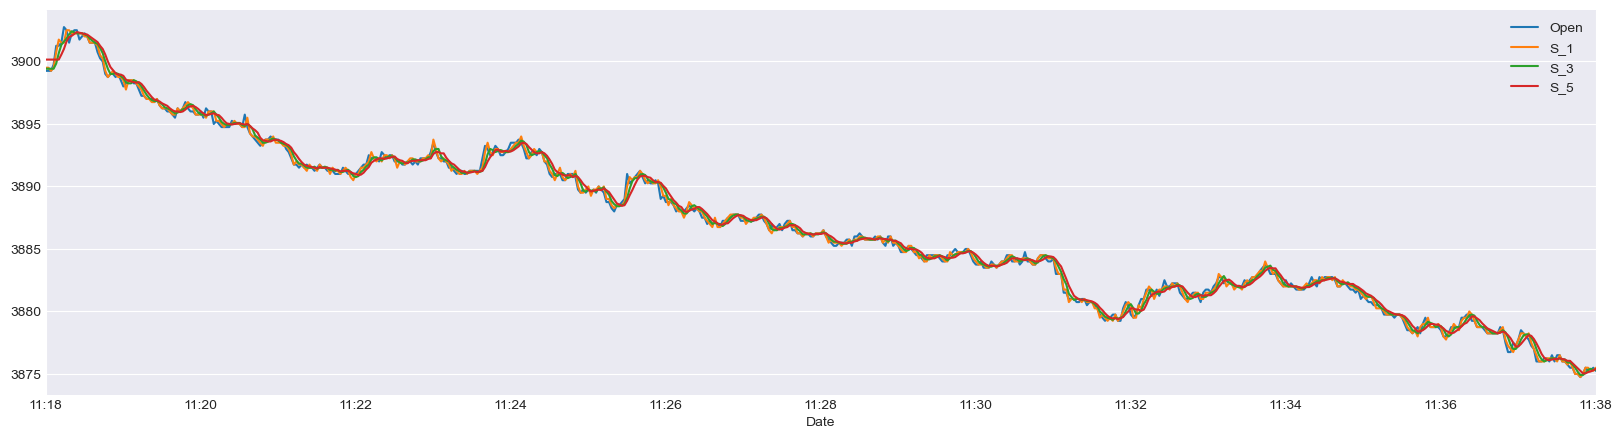

In [314]:
X[['Open' , 'S_1', 'S_3', 'S_5']].plot(figsize=(20,5) )

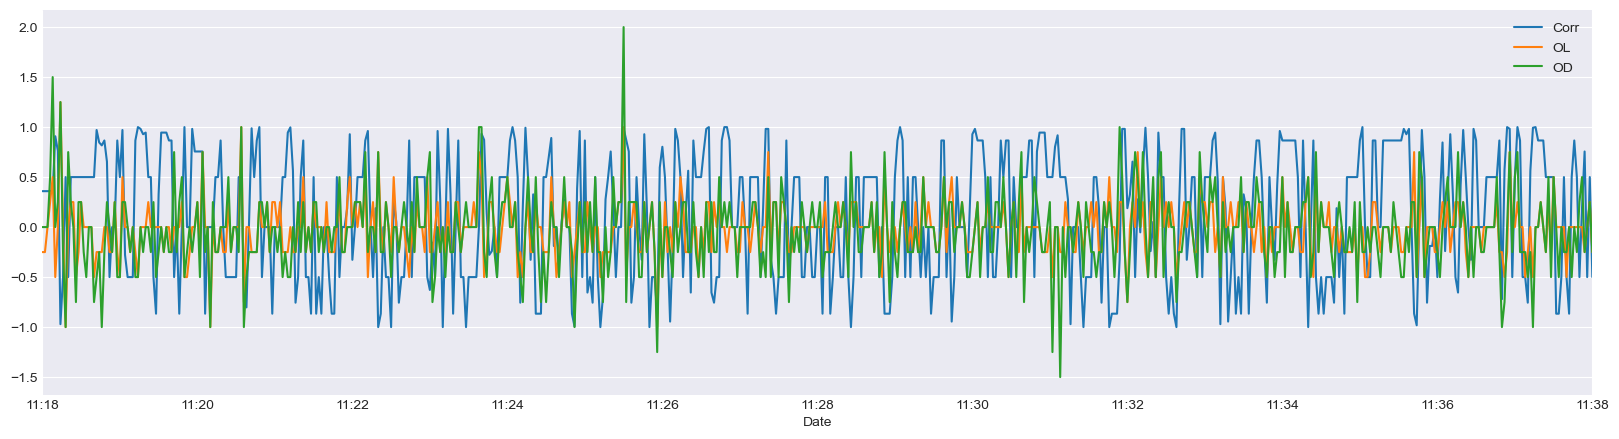

In [317]:
X[['Corr', 'OL', 'OD']].plot(figsize=(20,5) )

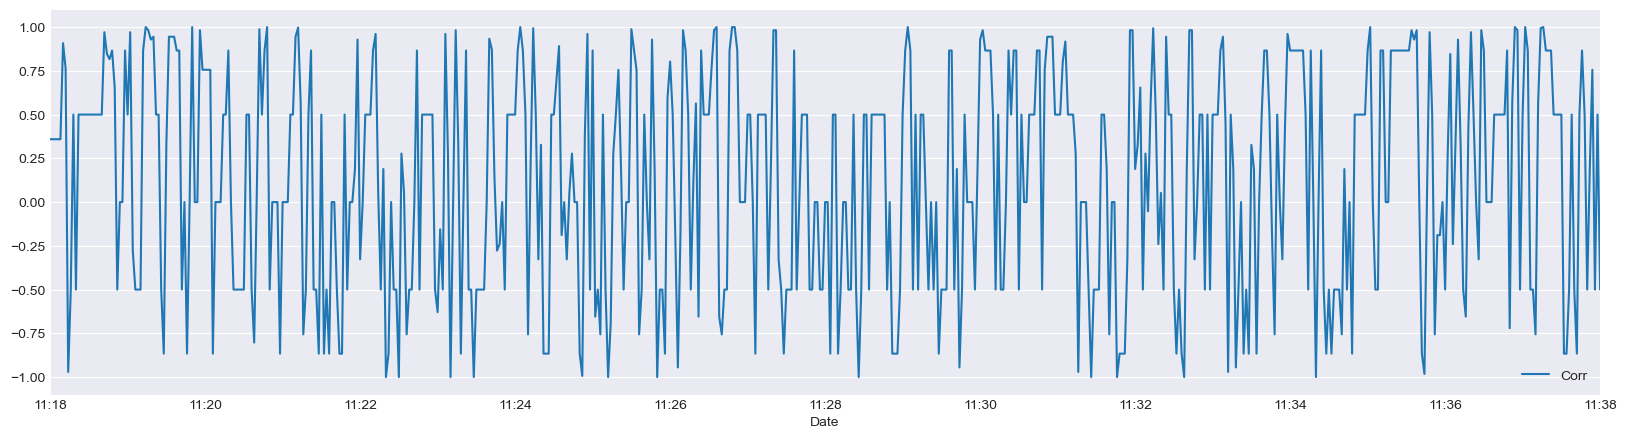

In [318]:
X[['Corr']].plot(figsize=(20,5) )

In [319]:

hovertext=[]
for i in range(len(lr1_1min['Open'])):
    hovertext.append('Open: '+str(lr1_1min['Open'][i])+'<br>Close: '+str(lr1_1min['Close'][i]))
    
fig = go.Figure(data= go.Ohlc(x= lr1_1min.index, open= lr1_1min['Open'], high= lr1_1min['High'],  
                low= lr1_1min['Low'], close= lr1_1min['Close'], text= hovertext, hoverinfo= 'text'))
fig.show()

In [575]:
# del lr1_1min['Time']
# lr1_1min['Time'] = str(lr1_1min.index).replace('2022-09-19 ', '')
lr1_1min.head()

,BidAsk,Vol,Open,High,Low,Close,S_1,S_3,S_5,Corr,Std_U,Std_D,OD,OL,new_time
Date,,,,,,,,,,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50,3899.50,3899.416667,3900.15,0.359211,0.25,0.0,0.0,-0.25,1.663586e+09
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25,3899.50,3899.416667,3900.15,0.359211,0.00,0.0,0.0,-0.25,1.663586e+09
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50,3899.25,3899.416667,3900.15,0.359211,0.25,0.0,0.0,0.00,1.663586e+09
2022-09-19 11:18:06,221,437,3899.75,3900.75,3899.75,3900.75,3899.50,3899.416667,3900.15,0.359211,1.00,0.0,0.5,0.25,1.663586e+09
2022-09-19 11:18:08,100,517,3901.25,3901.75,3901.25,3901.75,3900.75,3899.833333,3900.15,0.359211,0.50,0.0,1.5,0.50,1.663586e+09


In [43]:

lr1_1min['new_time'] = pd.to_datetime(lr1_1min.index).astype('int64') / 100 **9


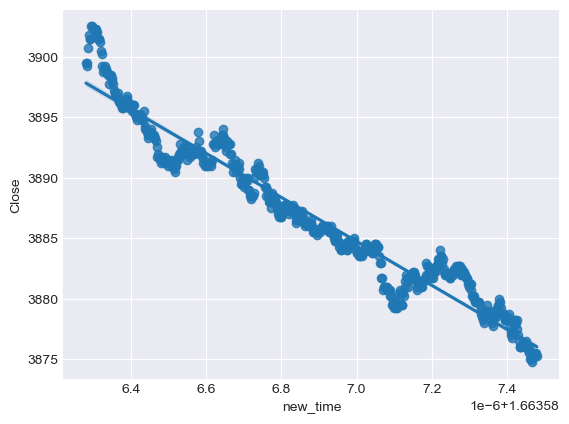

In [44]:
sns.regplot(x='new_time', y='Close', data= lr1_1min)

### Data Preprocessing, Scaling, Pipeline, Hyperparameters, Linear Regression

In [320]:
# park scaling and then linear regression in the pipeline.
steps = [('scaler', StandardScaler()),
         ('linear', LinearRegression())]

# Defining pipeline
pipeline = Pipeline(steps)

In [321]:
# Use intercept as hyperparameter
parameters = {'linear__fit_intercept': [0, 1]}

### Grid Search Cross-Validation

In [442]:
# Use TimeSeriesSplit for cross validation
my_cv = TimeSeriesSplit(n_splits= 20)

# Define reg as variable for GridSearch function containing pipeline, hyperparameters
reg = GridSearchCV(pipeline, parameters, cv= my_cv, error_score='raise')

### Split Train and Test Data

In [443]:
spilitting_ratio = .70

# Splitt data into two parts
split = int(spilitting_ratio * len(lr1_1min))

# Define train dataset
X_train = X[:split]
yU_train = yU[:split]
yD_train = yD[:split]

# Define test data
X_test = X[split:]

### Prediction

In [444]:
# Fit the model
reg.fit(X_train, yU_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [0, 1]})

In [445]:
# Print best parameter
print(reg.best_params_)

{'linear__fit_intercept': 0}


In [446]:
# Predict the upward deviation
yU_predict = reg.predict(X_test)
# yU_predict

In [447]:
# Fit the model
reg.fit(X_train, yD_train)

# Print best parameter
print(reg.best_params_)

# Predict the downward deviation
yD_predict = reg.predict(X_test)

{'linear__fit_intercept': 1}


- Create `yU_predict` and `yD_predict` columns in the `X_test`. Formulas for upward deviation and downward deviation are:

1.  Upward deviation  = High - Open

2.  Downward deviation = Open - Low

Upward and Downward deviation can not be negative. So, we replace negative values with zero.


In [448]:
# Create new column in X_test
X_test['yU_predict'] = yU_predict
X_test['yD_predict'] = yD_predict

# Assign zero to all negative predicted values to take into account real life conditions
X_test.loc[X_test['yU_predict'] < 0, 'yU_predict'] = 0
X_test.loc[X_test['yD_predict'] < 0, 'yD_predict'] = 0

In [449]:
# Add open values in ['yU_predict'] to get the predicted high column
X_test['P_H'] = X_test['Open'] + X_test['yU_predict']

# Subtract ['yD_predict'] values in open to get the predicted low column.
X_test['P_L'] = X_test['Open'] - X_test['yD_predict']
X_test.tail()

,Open,S_1,S_3,S_5,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L
Date,,,,,,,,,,,
2022-09-19 11:37:52,3875.50,3875.50,3875.083333,3875.05,0.50,0.00,0.188982,0.084267,0.112875,3875.584267,3875.387125
2022-09-19 11:37:54,3875.25,3875.50,3875.333333,3875.15,-0.25,-0.25,0.755929,0.068485,0.089769,3875.318485,3875.160231
2022-09-19 11:37:56,3875.25,3875.25,3875.416667,3875.20,0.00,0.00,-0.500000,0.042451,0.106368,3875.292451,3875.143632
2022-09-19 11:37:58,3875.50,3875.25,3875.333333,3875.30,0.25,0.25,0.500000,0.048482,0.099148,3875.548482,3875.400852
2022-09-19 11:38:00,3875.25,3875.50,3875.333333,3875.40,-0.25,-0.25,-0.500000,0.085286,0.105915,3875.335286,3875.144085


In [450]:
# Copy columns Close, High, Low from lr1_1min to X_test
X_test[['Close', 'High', 'Low']] = lr1_1min[['Close', 'High', 'Low']][split:]
X_test.tail()

,Open,S_1,S_3,S_5,OD,OL,Corr,yU_predict,yD_predict,P_H,P_L,Close,High,Low
Date,,,,,,,,,,,,,,
2022-09-19 11:37:52,3875.50,3875.50,3875.083333,3875.05,0.50,0.00,0.188982,0.084267,0.112875,3875.584267,3875.387125,3875.50,3875.50,3875.50
2022-09-19 11:37:54,3875.25,3875.50,3875.333333,3875.15,-0.25,-0.25,0.755929,0.068485,0.089769,3875.318485,3875.160231,3875.25,3875.25,3875.25
2022-09-19 11:37:56,3875.25,3875.25,3875.416667,3875.20,0.00,0.00,-0.500000,0.042451,0.106368,3875.292451,3875.143632,3875.25,3875.25,3875.25
2022-09-19 11:37:58,3875.50,3875.25,3875.333333,3875.30,0.25,0.25,0.500000,0.048482,0.099148,3875.548482,3875.400852,3875.50,3875.50,3875.50
2022-09-19 11:38:00,3875.25,3875.50,3875.333333,3875.40,-0.25,-0.25,-0.500000,0.085286,0.105915,3875.335286,3875.144085,3875.25,3875.25,3875.25


In [452]:
# Store the data for further metrics analysis
X_test[['Close', 'High','P_H', 'Low', 'P_L']].to_csv('test_dataset_pred_high_low_2sec_LR1.csv', index = True)

###  Strategy Analytics

In [453]:
import numpy as np
import pandas as pd
# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid') 
import warnings
warnings.filterwarnings("ignore")

In [475]:
# Importing the data
test_dataset = pd.read_csv('test_dataset_pred_high_low_2sec_LR1.csv', index_col='Date')

# Converting index into datetime format
test_dataset.index = pd.to_datetime(test_dataset.index)

# Printing the tail of test_dataset
test_dataset.tail()

,Close,High,P_H,Low,P_L
Date,,,,,
2022-09-19 11:37:52,3875.50,3875.50,3875.584267,3875.50,3875.387125
2022-09-19 11:37:54,3875.25,3875.25,3875.318485,3875.25,3875.160231
2022-09-19 11:37:56,3875.25,3875.25,3875.292451,3875.25,3875.143632
2022-09-19 11:37:58,3875.50,3875.50,3875.548482,3875.50,3875.400852
2022-09-19 11:38:00,3875.25,3875.25,3875.335286,3875.25,3875.144085


### Signal Generation

###   Experiments with strategy  .. .. experiment with varioes settings
- shift(5) : less trades wich in this context produced better results
- reversing Signs for experimentation 1 to -1 and -1 to 1: not better results
- reversing back Signs
- shift(10) : not good, worst...
- reverse signs : less and better trades but incorrect showing in strstegy performance - check the function pertaining to Strategy metrics...
- back to normal Signal: 1 for Buy, -1 for Sell
- reverse < with > and vv
 

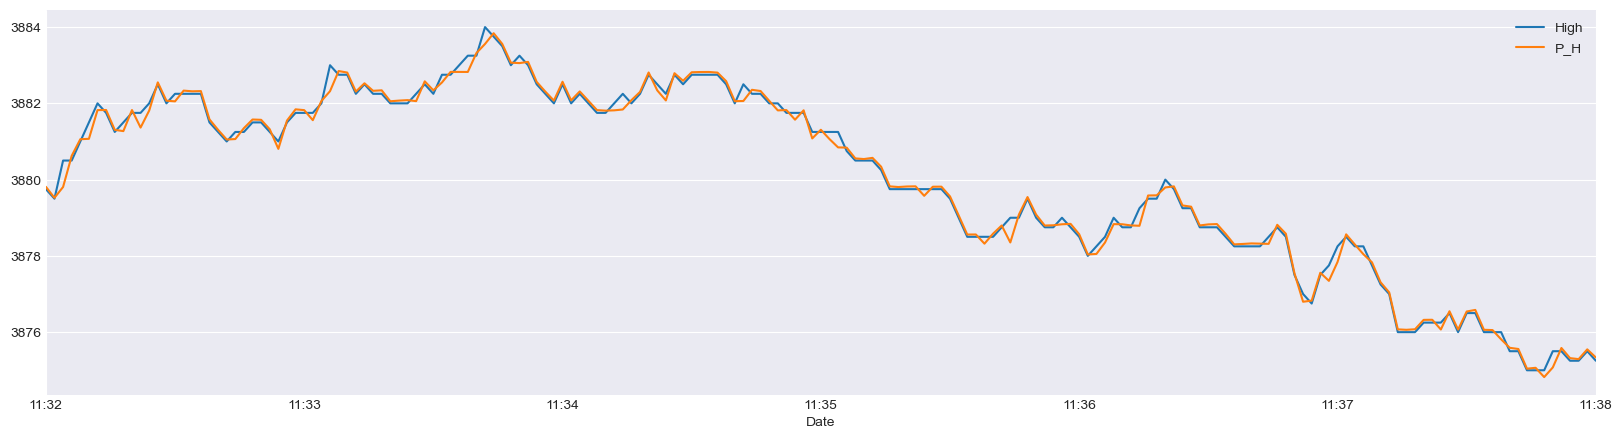

In [476]:
test_dataset[['High' , 'P_H']].plot(figsize=(20,5) )

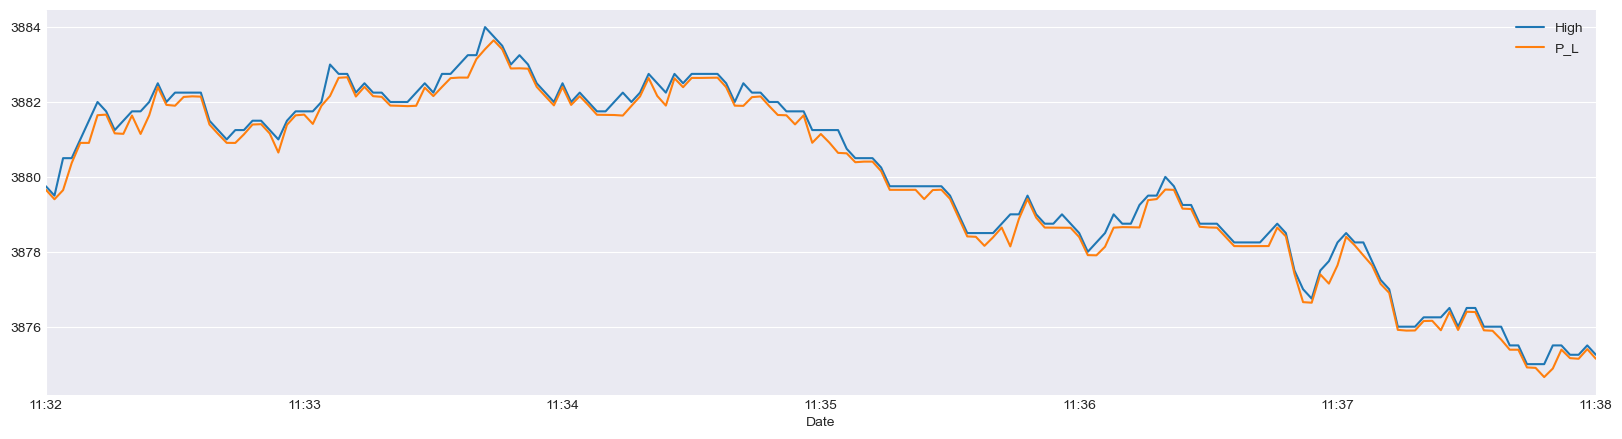

In [493]:
test_dataset[['High' , 'P_L']].plot(figsize=(20,5) )

## The daily fluctuations of the Market are most often geared (unless there is a clear trend) towards going in a direction opposite of expectations. That is because of multiple factors: 
- it needs inventory to run on and generate profits (going in the opposite direction of most retail traders)
- when all money are bet on 1 side, there is no more to go on the same side, hence Market reverses
- Market always has more reserve funds parked waiting 'for good opportunities'
- there are short, mid, long term players, both institutional and retailer, so at anytime anything can happen
- market news and global events influence fluctuations 
- Market is geared to 'hurt' the greatest number of people at any time (this in itself offers `contrarian type of strategizing`)
#### Our premise will be: `opposite of probable expectations` (by probable is meant: logical, rational, simple, expected, natural... )

In [512]:
# Initialise signal column to be zero
test_dataset['Signal'] = 0

# When selling, assigning signal value as -1
test_dataset.loc[(test_dataset['High'] < test_dataset['P_L'].shift(20)) & ( test_dataset['Low'] < test_dataset['P_H'].shift(20)), 'Signal'] = -1


#   reversing signs for experimentation did not produce better results... reversing ... ... ... ...  


# When buying, assigning signal value as +1
test_dataset.loc[(test_dataset['High'] > test_dataset['P_L'].shift(20)) & ( test_dataset['Low'] > test_dataset['P_H'].shift(20)), 'Signal'] = 1


In [513]:
test_dataset.head(20)

,Close,High,P_H,Low,P_L,Signal,asset1_returns,strategy_returns
Date,,,,,,,,
2022-09-19 11:32:00,3879.50,3879.75,3879.812527,3879.50,3879.657693,0,NaN,NaN
2022-09-19 11:32:02,3879.50,3879.50,3879.523115,3879.50,3879.402825,0,0.000000,0.000000
2022-09-19 11:32:04,3880.50,3880.50,3879.806629,3879.75,3879.646267,0,0.000258,0.000000
2022-09-19 11:32:06,3880.25,3880.50,3880.623266,3880.25,3880.370553,0,-0.000064,-0.000000
2022-09-19 11:32:08,3881.00,3881.00,3881.058891,3881.00,3880.907846,0,0.000193,0.000000
2022-09-19 11:32:10,3881.50,3881.50,3881.069955,3881.00,3880.907779,0,0.000129,0.000000
2022-09-19 11:32:12,3882.00,3882.00,3881.823030,3881.75,3881.647145,0,0.000129,0.000000
2022-09-19 11:32:14,3881.75,3881.75,3881.825241,3881.75,3881.662569,0,-0.000064,-0.000000
2022-09-19 11:32:16,3881.00,3881.25,3881.304951,3881.00,3881.162297,0,-0.000193,-0.000000


### Strategy Returns metrics

In [514]:
# Compute returns
test_dataset['asset1_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['strategy_returns'] = test_dataset['asset1_returns'] *  (test_dataset['Signal'].shift(1))

# Printing tail of the test_dataset
test_dataset.tail()

# Save the test_dataset as ml_regression_asset1min_strategy_data.csv for further analysis
test_dataset.to_csv('ml_regression_es_2sec_strategy_data.csv', index = True)

### Plot

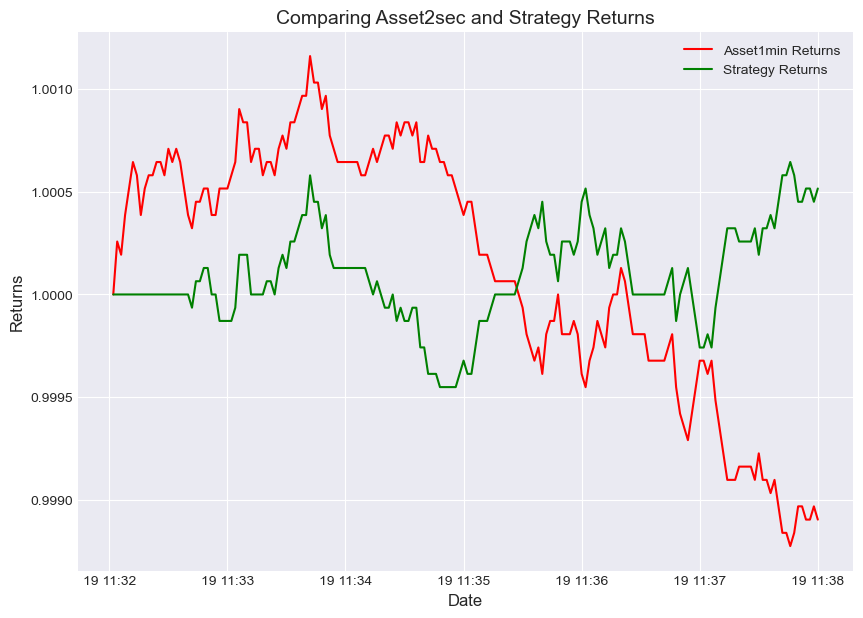

In [515]:
plt.figure(figsize=(10, 7))

# Plotting gld_returns
plt.plot(((test_dataset['asset1_returns'][:]+1).cumprod()),
         color='r', label='Asset1min Returns')

# Plotting test_dataset
plt.plot(((test_dataset['strategy_returns'][:]+1).cumprod()),
         color='g', label='Strategy Returns')

# x-labeling
plt.xlabel('Date', fontsize=12)

# y-labeling
plt.ylabel('Returns', fontsize=12)

# Titlename
plt.title('Comparing Asset2sec and Strategy Returns', fontsize=14)
plt.legend()
plt.show()

### Performance Analysis

In [ ]:
!pip install pyfolio

In [516]:
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

#For strategy analysis
import pyfolio as pf

In [517]:
strategy_data = pd.read_csv( 'ml_regression_es_2sec_strategy_data.csv', parse_dates=['Date'], index_col='Date')
strategy_data.fillna(method='bfill', inplace=True)
strategy_data.head()

,Close,High,P_H,Low,P_L,Signal,asset1_returns,strategy_returns
Date,,,,,,,,
2022-09-19 11:32:00,3879.50,3879.75,3879.812527,3879.50,3879.657693,0,0.000000,0.0
2022-09-19 11:32:02,3879.50,3879.50,3879.523115,3879.50,3879.402825,0,0.000000,0.0
2022-09-19 11:32:04,3880.50,3880.50,3879.806629,3879.75,3879.646267,0,0.000258,0.0
2022-09-19 11:32:06,3880.25,3880.50,3880.623266,3880.25,3880.370553,0,-0.000064,-0.0
2022-09-19 11:32:08,3881.00,3881.00,3881.058891,3881.00,3880.907846,0,0.000193,0.0


In [518]:
# The below function returns the Sharpe ratio for the excess returns
# def annualized_sharpe_ratio(returns, N= 16):
#     return np.sqrt(N) * returns.mean() / returns.std()
def _sharpe_ratio(returns, N= 20):      # 20 for 20 minutes
    return np.sqrt(N) * returns.mean() / returns.std()

# Calculate the excess minute return by assuming an daily risk free rate of return of 5%  # or minute risk of 0.02
# excess_daily_strategy_return = strategy_data['strategy_returns'] - 0.02 / 16
excess_strategy_return = strategy_data['strategy_returns'] - 0.02 / 60

# Calculate the annualized Sharpe ratio
sharpe = _sharpe_ratio(excess_strategy_return)
print('Sharpe', sharpe)

Sharpe -18.019200734156485


In [519]:
def get_trades(data, close_column, signal_column):
    """Function to generate trade details
    """
    # Intializing trades dataframe
    trades = pd.DataFrame()

    # There are no current positions open at the beginning
    current_position = 0

    # Creating an empty string for entry_date
    entry_date = ''

    for i in data.index:

        # Save the signal generated on date i in 'new_position'
        new_position = data.loc[i, signal_column]

        # We don't take any action if the current_position is equal to the signal generated at date i.
        # The below code will run if the signal generated is not equal to current_position.
        if new_position != current_position:

            # The below code will run if the entry_date is not empty
            if entry_date != '':

                # save entry price in entry_price
                entry_price = data.loc[entry_date, close_column]

                # Since the signal and current_position are not equal, we exit the position at date i
                exit_date = i

                # Save exit price in exit_price
                exit_price = data.loc[exit_date, close_column]

                # Create a dataframe trade_details with trade details
                trade_details = pd.DataFrame(
                    [(current_position, entry_date, entry_price, exit_date, exit_price)])

                # Update the trades dataframe in every loop
                trades = trades.append(trade_details, ignore_index=True)

                # Reset the entry_date
                entry_date = ''

            # If the new_position i.e. signal generated at i is not '0' and also not equal to current_position, we will enter either short or long trade
            if new_position != 0:

                # Save entry date of trade in entry_date
                entry_date = i

            # Update the current_position with signal generated on date i
            current_position = new_position

    # Creating below five columns in trades dataframe.
    trades.columns = ['Position', 'Entry Date',
                      'Entry Price', 'Exit Date', 'Exit Price']

    # Create a column in trades dataframe to store the profit and loss from each trade
    trades['PnL'] = (trades['Exit Price'] -
                     trades['Entry Price']) * trades['Position']

    # Returns 'trades' dataframe
    return trades

In [520]:
def get_analytics(trades):
    """Function to generate strategy analytics
    """

    analytics = pd.DataFrame(index=['Strategy'])
    # Number of long trades
    analytics['num_of_long'] = len(trades.loc[trades.Position == 1])
    # Number of short trades
    analytics['num_of_short'] = len(trades.loc[trades.Position == -1])
    # Total number of trades
    analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short

    # Gross Profit
    analytics['gross_profit'] = trades.loc[trades.PnL > 0].PnL.sum()
    # Gross Loss
    analytics['gross_loss'] = trades.loc[trades.PnL < 0].PnL.sum()

    # Net Profit
    analytics['net_profit'] = trades.PnL.sum()

    # Profitable trades
    analytics['winners'] = len(trades.loc[trades.PnL > 0])
    # Loss-making trades
    analytics['losers'] = len(trades.loc[trades.PnL <= 0])
    # Win percentage
    analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
    # Loss percentage
    analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
    # Per trade profit/loss of winning trades
    analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL > 0].PnL.mean()
    # Per trade profit/loss of losing trades
    analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL <= 0].PnL.mean()

    return analytics.T

In [521]:
# Using get_trades function to evaluate trades detail
trades = get_trades(strategy_data, 'Close', 'Signal')
print('Trade Details')

# Printing trades dataframe
trades.head(5)

Trade Details


,Position,Entry Date,Entry Price,Exit Date,Exit Price,PnL
0,1,2022-09-19 11:32:40,3881.00,2022-09-19 11:32:52,3881.0,0.00
1,-1,2022-09-19 11:32:52,3881.00,2022-09-19 11:32:56,3881.5,-0.50
2,1,2022-09-19 11:32:56,3881.50,2022-09-19 11:33:00,3881.5,0.00
3,1,2022-09-19 11:33:02,3881.75,2022-09-19 11:33:06,3883.0,1.25
4,1,2022-09-19 11:33:08,3882.75,2022-09-19 11:33:12,3882.0,-0.75


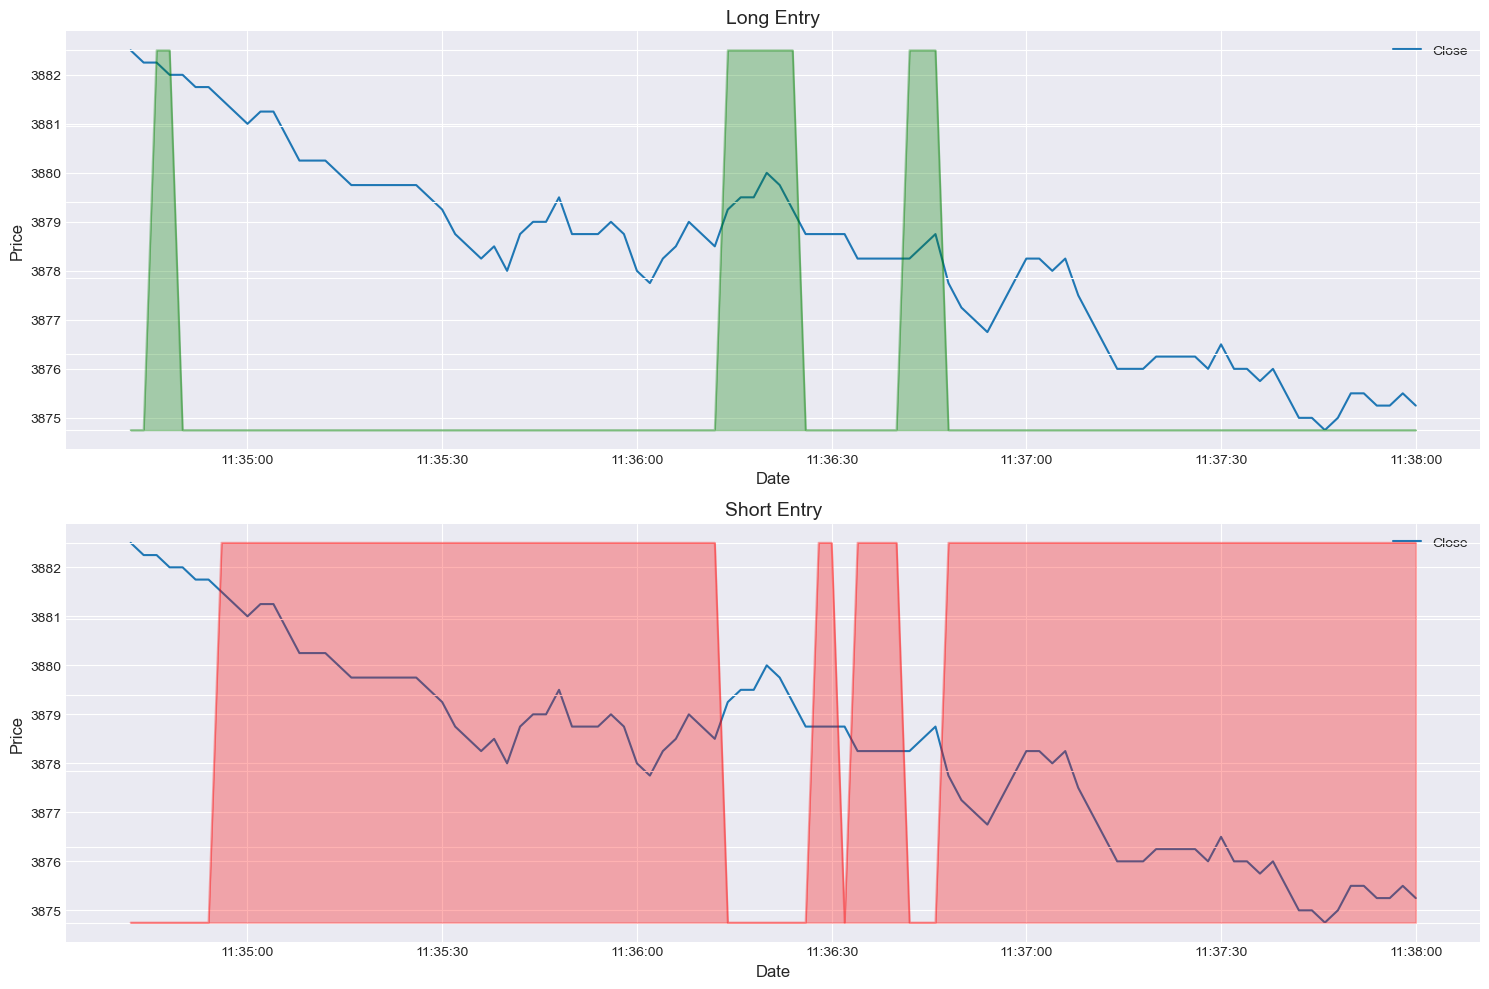

In [522]:
import matplotlib.pyplot as plt

# Showing the last 100 points for illustration purpose
test_dataset_for_plot = strategy_data[-100:]

# When signal is 1 we take long entry
test_dataset_for_plot['long_entry'] = test_dataset_for_plot.Signal == 1

# When signal is -1 we take short entry
test_dataset_for_plot['short_entry'] = test_dataset_for_plot.Signal == -1

fig = plt.figure(figsize=(15, 10))

# Sub plot for the long entry
ax = fig.add_subplot(211)

# Plotting close price
ax.plot(test_dataset_for_plot['Close'], label='Close')

# Set the title and axis labels
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Long Entry', fontsize=14)
ax.legend()


# Twinx() creates a new axes with an invisible x-axis and y axis positioned opposite to the original one
ax2 = ax.twinx()

# Plotting long entry
ax2.plot(test_dataset_for_plot['long_entry'], color='g', alpha= 0.3)
ax2.fill_between(test_dataset_for_plot['long_entry'].index,
                 test_dataset_for_plot['long_entry'].values, color='g', alpha= 0.3)
ax2.tick_params(labelright=False)

# Sub plot for the short position
ax = fig.add_subplot(212)

# Plot the close price
ax.plot(test_dataset_for_plot['Close'], label='Close')


# Set the title and axis labels
ax.set_title('Short Entry', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.legend()

# Plotting short entry
ax2 = ax.twinx()
ax2.plot(test_dataset_for_plot['short_entry'], color='r', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['short_entry'].index,
                 test_dataset_for_plot['short_entry'].values, color='r', alpha=0.3)
ax2.tick_params(labelright=False)

plt.tight_layout()
plt.show()

In [523]:
# Calling get_analytics to analyse trades
analytics = get_analytics(trades)
print('Trade Analytics')

# Rounding off to two decimal places
round(analytics, 2)

Trade Analytics


,Strategy
num_of_long,9.00
num_of_short,7.00
total_trades,16.00
gross_profit,4.00
gross_loss,-4.50
net_profit,-0.50
winners,3.00
losers,13.00
win_percentage,18.75
loss_percentage,81.25


In [524]:
# Calculating close price change percentage
strategy_data['returns'] = strategy_data.Close.pct_change()

# Strategy return depends on the last day signal
strategy_data['strategy_returns'] = strategy_data['returns'] * strategy_data['Signal'].shift(1)
strategy_data.head()

,Close,High,P_H,Low,P_L,Signal,asset1_returns,strategy_returns,returns
Date,,,,,,,,,
2022-09-19 11:32:00,3879.50,3879.75,3879.812527,3879.50,3879.657693,0,0.000000,NaN,NaN
2022-09-19 11:32:02,3879.50,3879.50,3879.523115,3879.50,3879.402825,0,0.000000,0.0,0.000000
2022-09-19 11:32:04,3880.50,3880.50,3879.806629,3879.75,3879.646267,0,0.000258,0.0,0.000258
2022-09-19 11:32:06,3880.25,3880.50,3880.623266,3880.25,3880.370553,0,-0.000064,-0.0,-0.000064
2022-09-19 11:32:08,3881.00,3881.00,3881.058891,3881.00,3880.907846,0,0.000193,0.0,0.000193


### Strategy Analysis

Start date,2022-09-19
End date,2022-09-19
Total months,8
,Backtest
Annual return,0.1%
Cumulative returns,0.1%
Annual volatility,0.1%
Sharpe ratio,0.55
Calmar ratio,0.70
Stability,0.11
Max drawdown,-0.1%


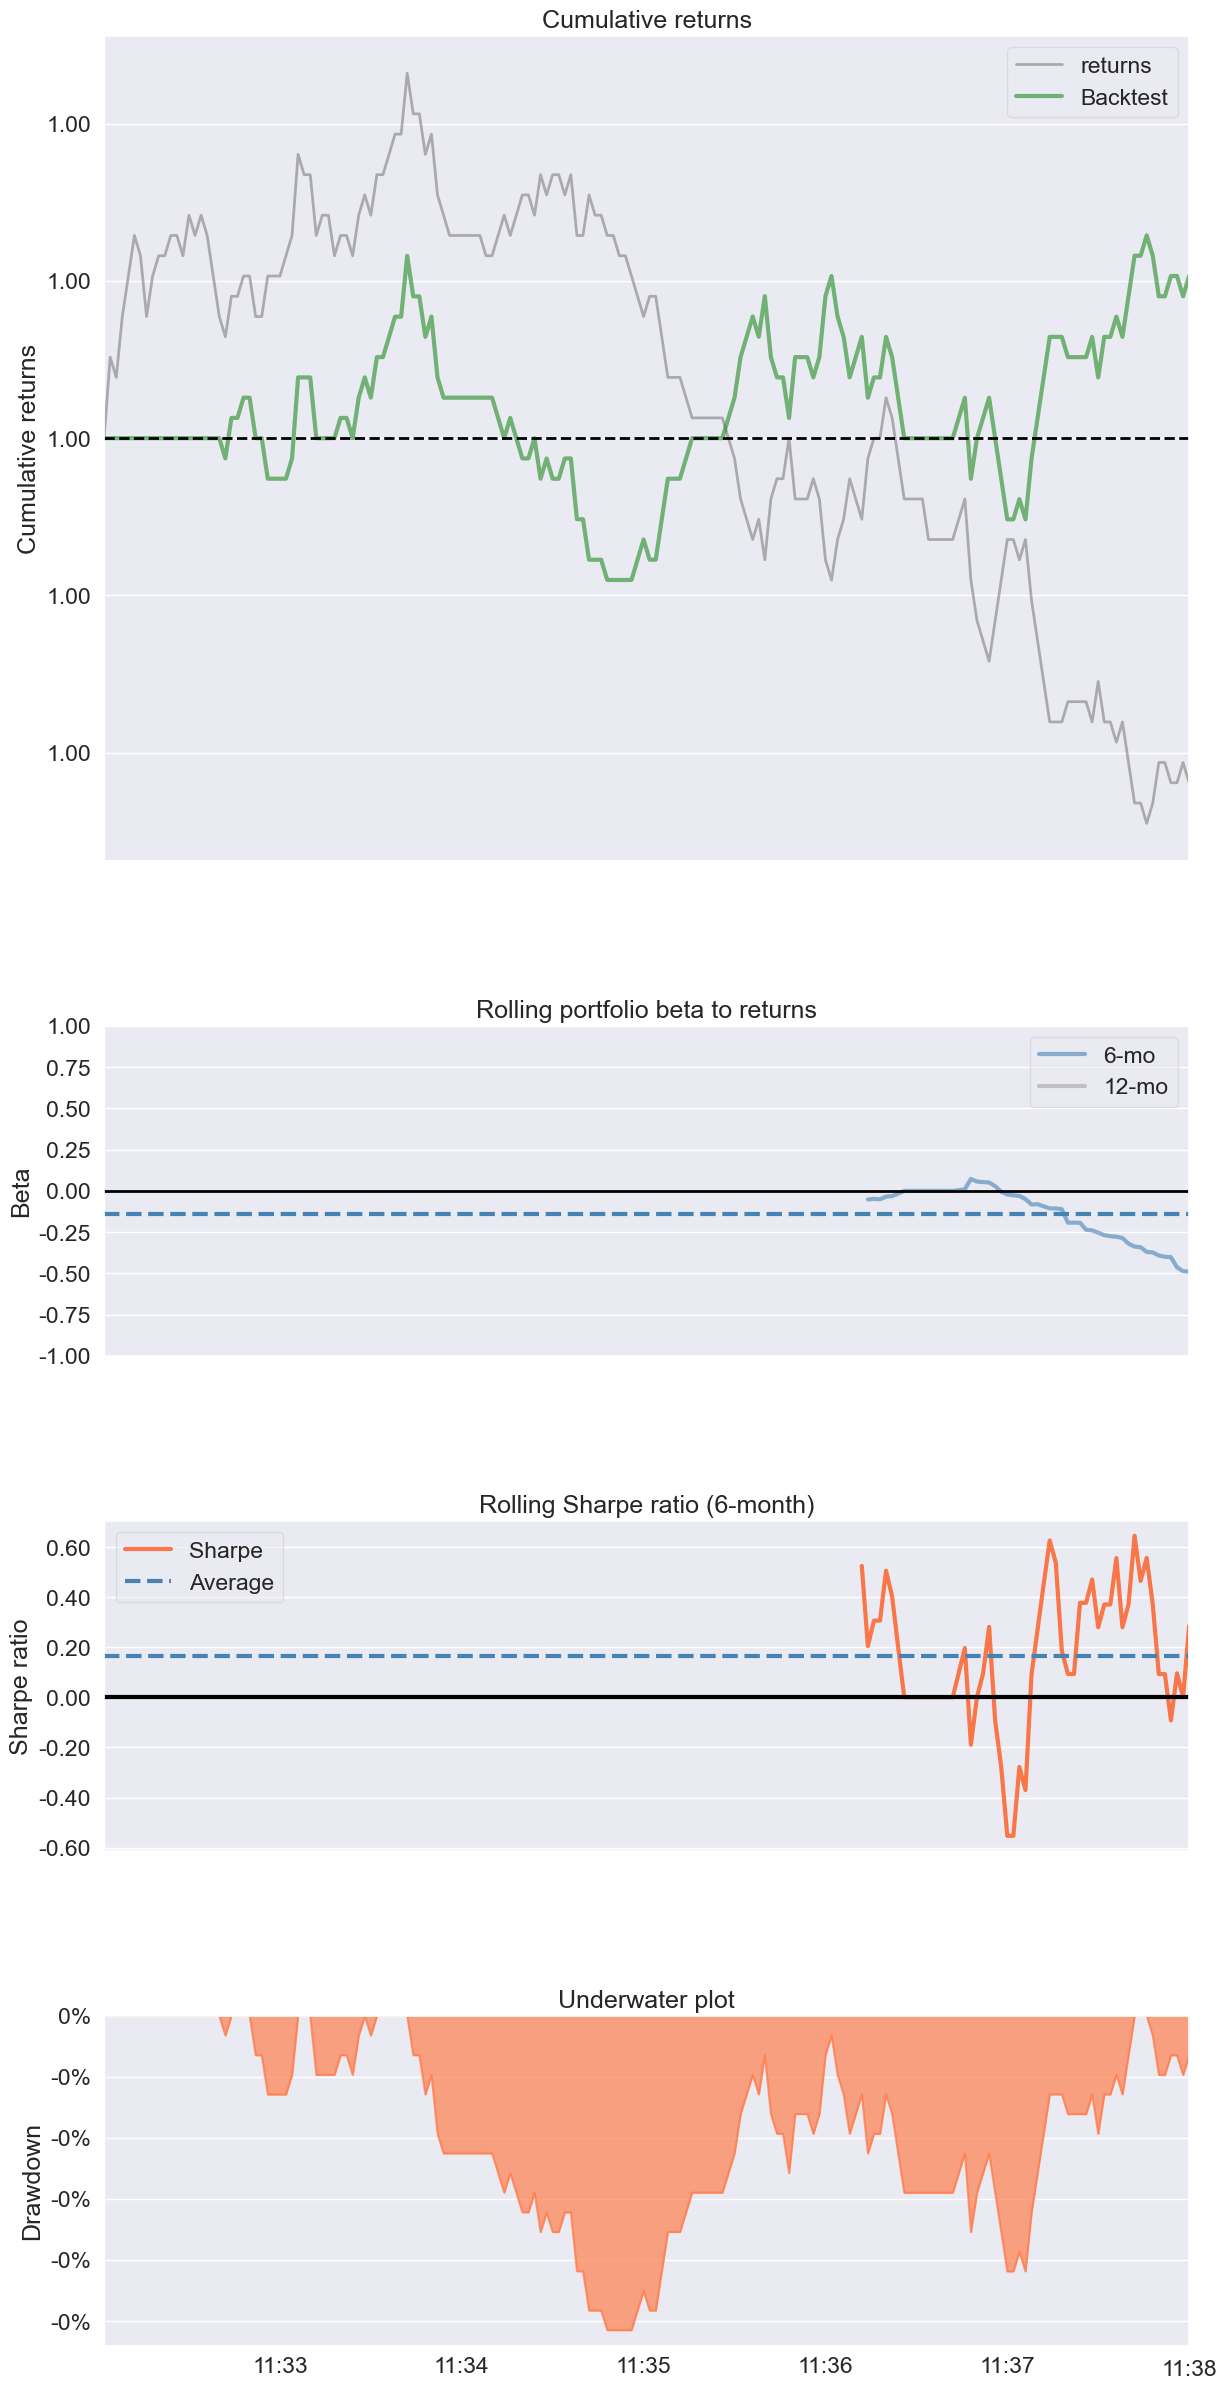

In [525]:
#Checking for NaN values
strategy_data.isna().sum()

# Dropping the NaN values 
strategy_data.dropna(inplace = True)
strategy_data.head()

# Creating pyfolio tear sheet
pf.create_simple_tear_sheet(strategy_data['strategy_returns'], benchmark_rets = strategy_data['returns']) 